# 0.0 IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display    import HTML

# 0.1 HELPS FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.2 LOADING THE DATAS

In [4]:
df_raw = pd.read_csv('/home/guilherme/Documentos/repos/pa_health_cross_sell/projeto/df_raw.csv')
df_raw.head()

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,7,0,23367.0,249,0,Male,23,11.0,152.0,1,< 1 Year,Yes
1,13,1,31409.0,221,0,Female,41,15.0,14.0,1,1-2 Year,No
2,18,1,46622.0,299,0,Female,25,35.0,152.0,1,< 1 Year,No
3,31,0,2630.0,136,0,Female,26,8.0,160.0,1,< 1 Year,No
4,39,0,42297.0,264,0,Male,45,8.0,124.0,1,1-2 Year,Yes


# 1.0 DESCRIPTION THE DATAS

In [5]:
df1 = df_raw.copy(deep=True)

## 1.1 RENAME COLUMNS

**The columns are in format snackcase. Then not is necessary rename the columns** 

In [6]:
df1.columns

Index(['id', 'previously_insured', 'annual_premium', 'vintage', 'response',
       'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

## 1.2 DATA DIMENSIONS

In [7]:
print('The number of rows: {}'.format( df1.shape[0] ) )
print('The number of rows: {}'.format( df1.shape[1] ) )

The number of rows: 381109
The number of rows: 12


## 1.3 DATA TYPES

In [8]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.4 CHECK NA

In [9]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.5 CHANGE TYPES

In [10]:
df1['region_code']    = df1['region_code'].astype(int)

df1['annual_premium'] = df1['annual_premium'].astype(int)

df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

df1.dtypes

id                       int64
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
dtype: object

## 1.6 DESCRIPTIVE STASTITICS 

In [11]:
num_attributes = df1.select_dtypes(include = 'int64')
cat_attributes = df1.select_dtypes(exclude = 'int64')

## 1.7 NUMERIC ATTRIBUTES

In [12]:
# =========================== TENDENCY CENTRAL =============================================== #

#mean and median 
t1 = pd.DataFrame( num_attributes.apply( lambda x: np.mean(x)  ) ).T
t2 = pd.DataFrame( num_attributes.apply( lambda x: np.median(x) ) ).T

#
#min
d1 = pd.DataFrame( num_attributes.apply(lambda x: np.min(x) ) ).T

#max
d2 = pd.DataFrame( num_attributes.apply(lambda x: np.max(x) ) ).T

#range
d3 = pd.DataFrame( num_attributes.apply(lambda x: np.max(x) - np.min(x) ) ).T

#std 
d4 = pd.DataFrame( num_attributes.apply(lambda x: np.std(x) ) ).T

#skew
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T

#kurtosis
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis() ) ).T

#concat the columns of metrics
metric = pd.concat( [t1,t2,d1,d2,d3,d4,d5,d6] ).T.reset_index()

#rename the columns
metric.columns = ['attributes','mean','median','min','max','range','std','skew','kurtosis']

#result
metric

,attributes,mean,median,min,max,range,std,skew,kurtosis
0,id,190555.000000,190555.0,1.0,381109.0,381108.0,110016.691870,-8.071174e-18,-1.200000
1,previously_insured,0.458210,0.0,0.0,1.0,1.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,30564.389581,31669.0,2630.0,540165.0,537535.0,17213.132474,1.766087e+00,34.004569
3,vintage,154.347397,154.0,10.0,299.0,289.0,83.671194,3.029517e-03,-1.200688
4,response,0.122563,0.0,0.0,1.0,1.0,0.327935,2.301906e+00,3.298788
5,age,38.822584,36.0,20.0,85.0,65.0,15.511591,6.725390e-01,-0.565655
6,region_code,26.388807,28.0,0.0,52.0,52.0,13.229871,-1.152664e-01,-0.867857
7,policy_sales_channel,112.034295,133.0,1.0,163.0,162.0,54.203924,-9.000081e-01,-0.970810
8,driving_license,0.997869,1.0,0.0,1.0,1.0,0.046109,-2.159518e+01,464.354302


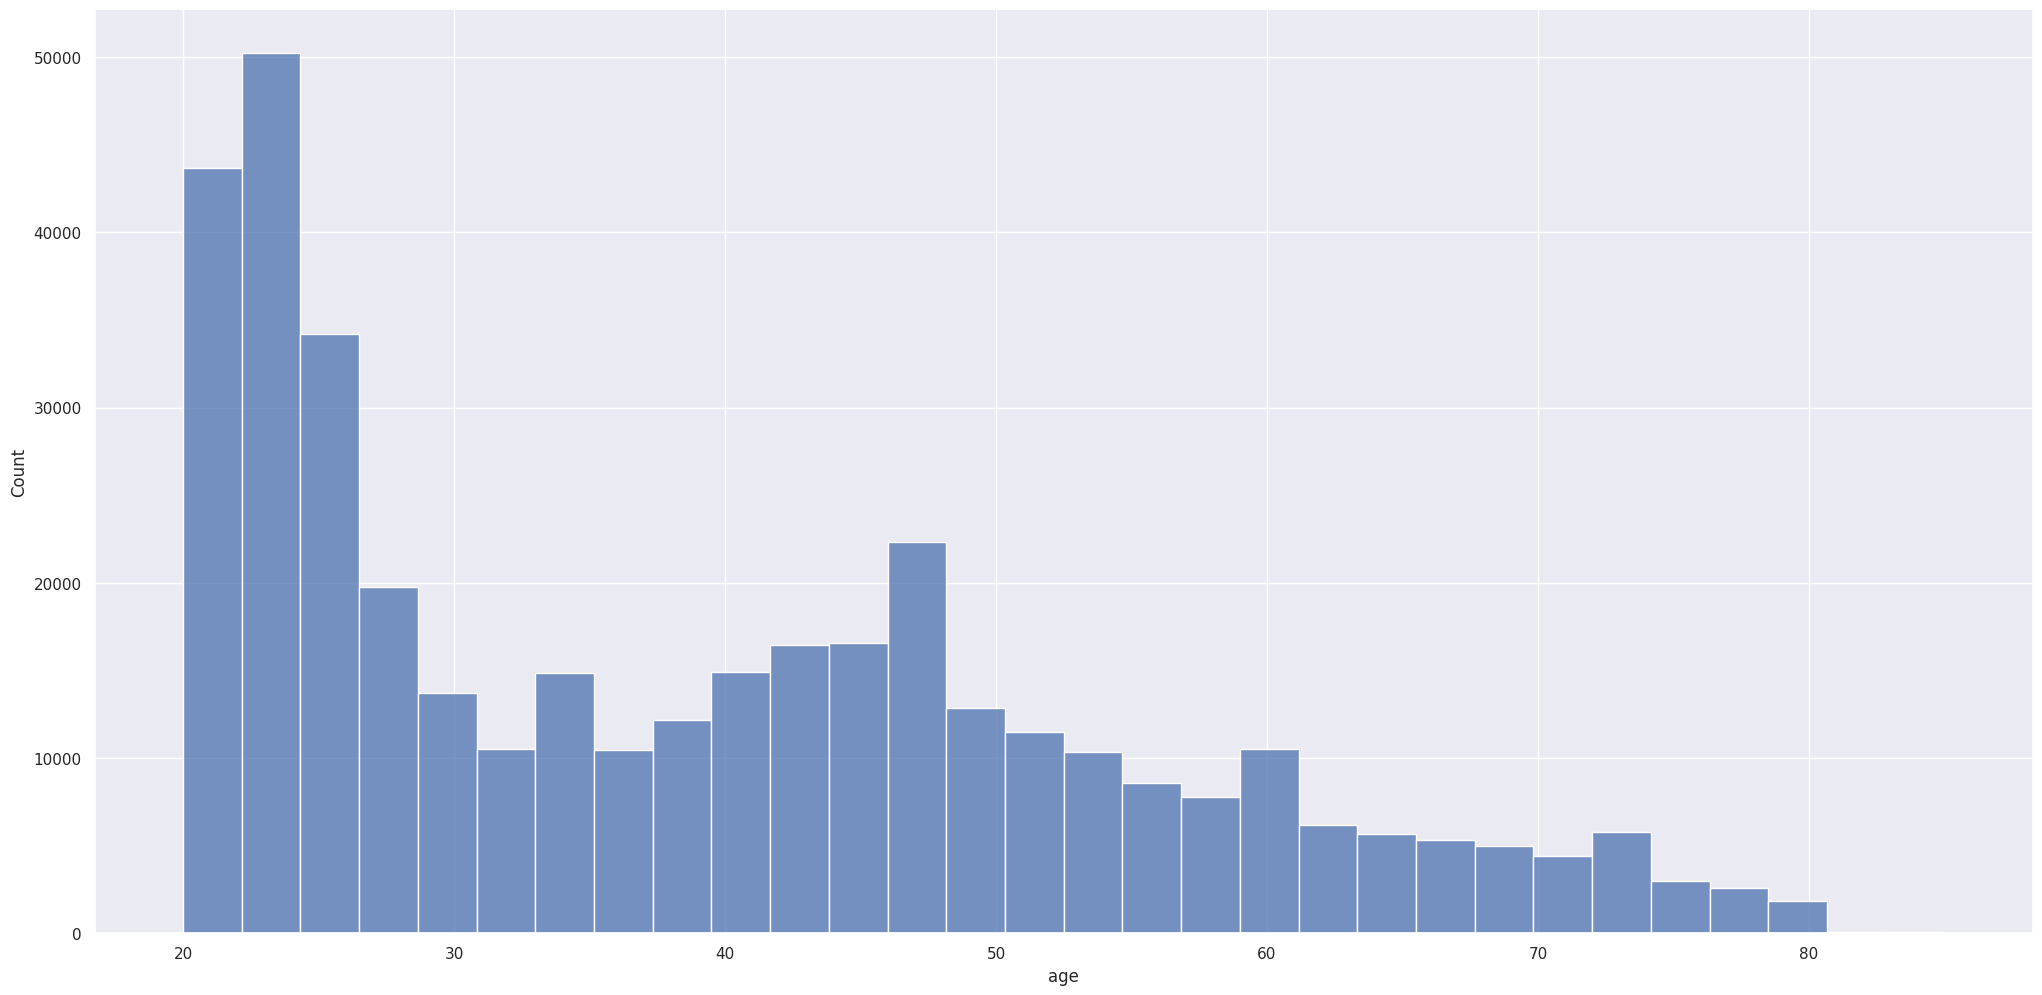

In [13]:
sns.histplot(df1['age'],bins=30);

## 1.7.1 CATEGORICAL ATTRIBUTES

In [14]:
#numbers of categorical attributes by feature
cat_attributes.apply(lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

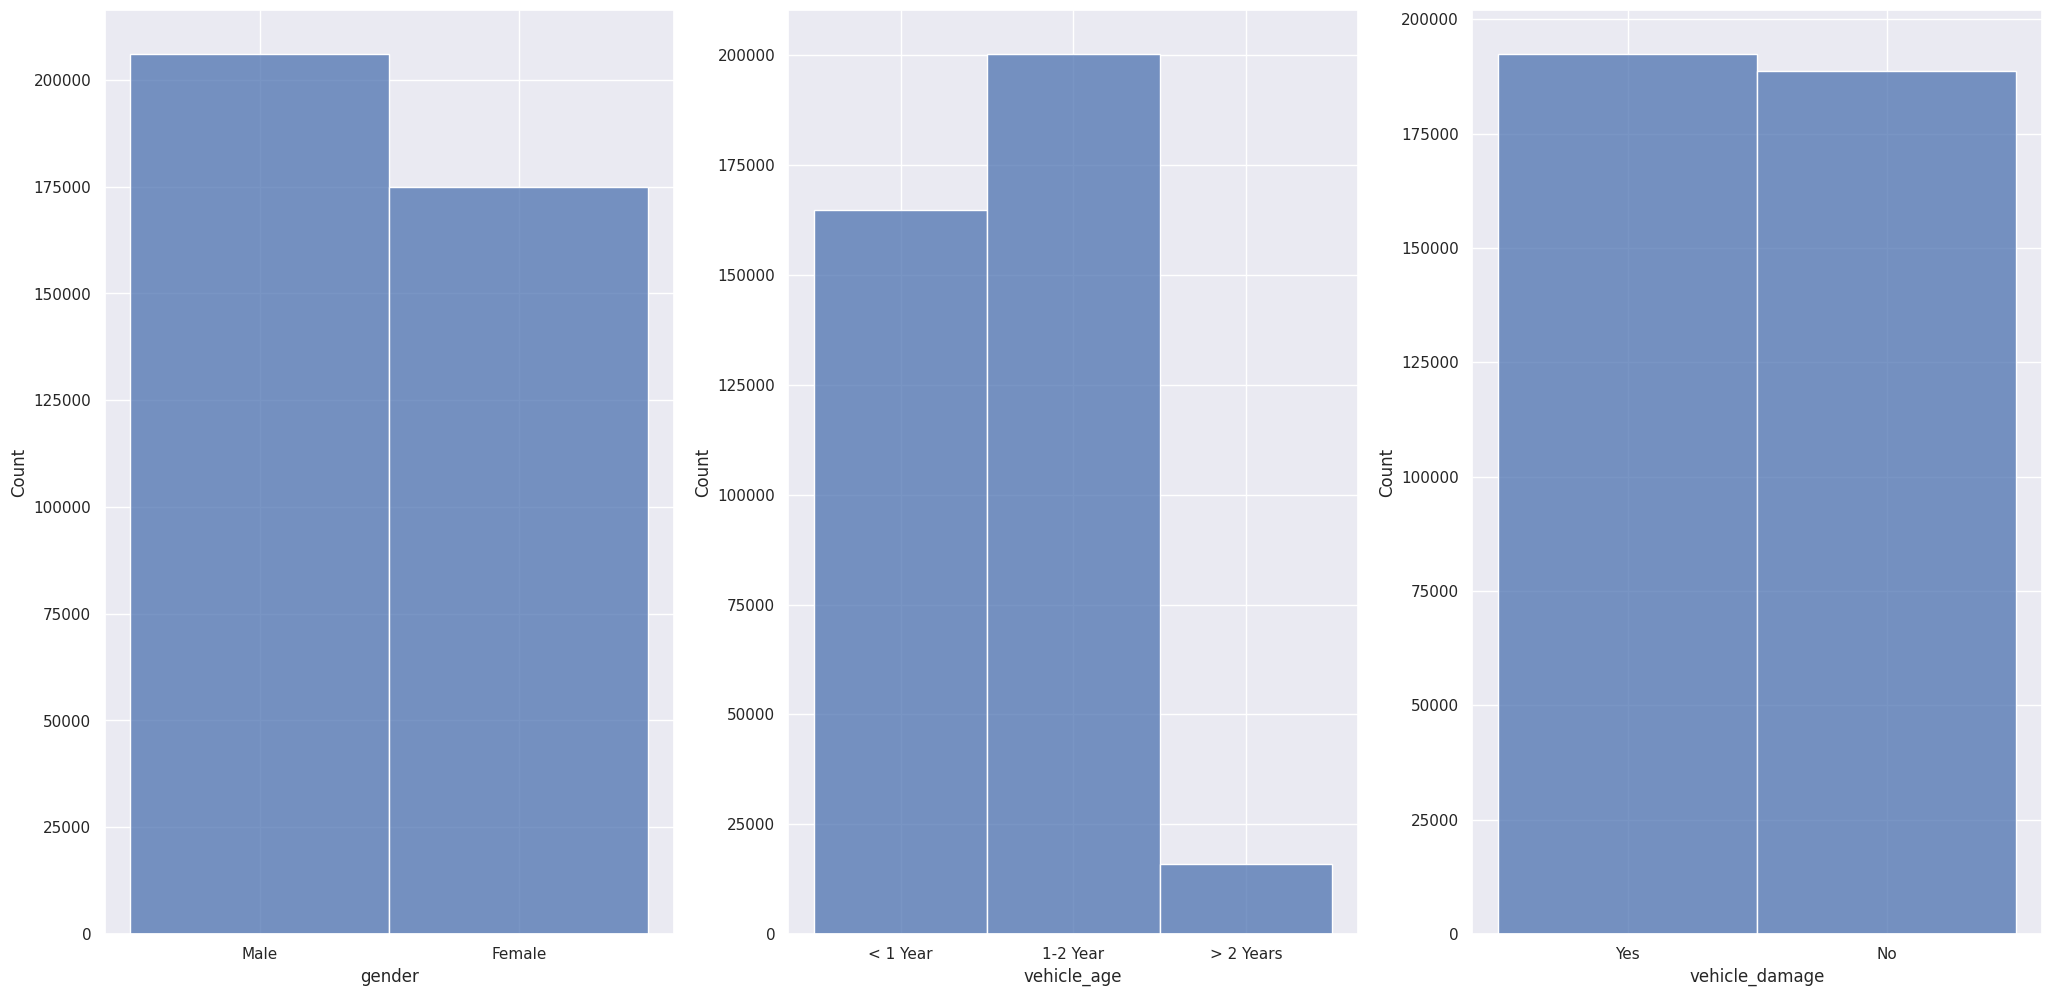

In [15]:
#plot of gender
plt.subplot(1,3,1)
sns.histplot(df1['gender'],bins=30);

#plot of vehicle age
plt.subplot(1,3,2)
sns.histplot(df1['vehicle_age'],bins=30);

#plot of vehicle damage
plt.subplot(1,3,3)
sns.histplot(df1['vehicle_damage'],bins=30);

# 2.0 FEATURE ENGINEERING

In [123]:
df2 = df1.copy(deep=True)

## 2.1 MIND MAP HPYOTHESIS

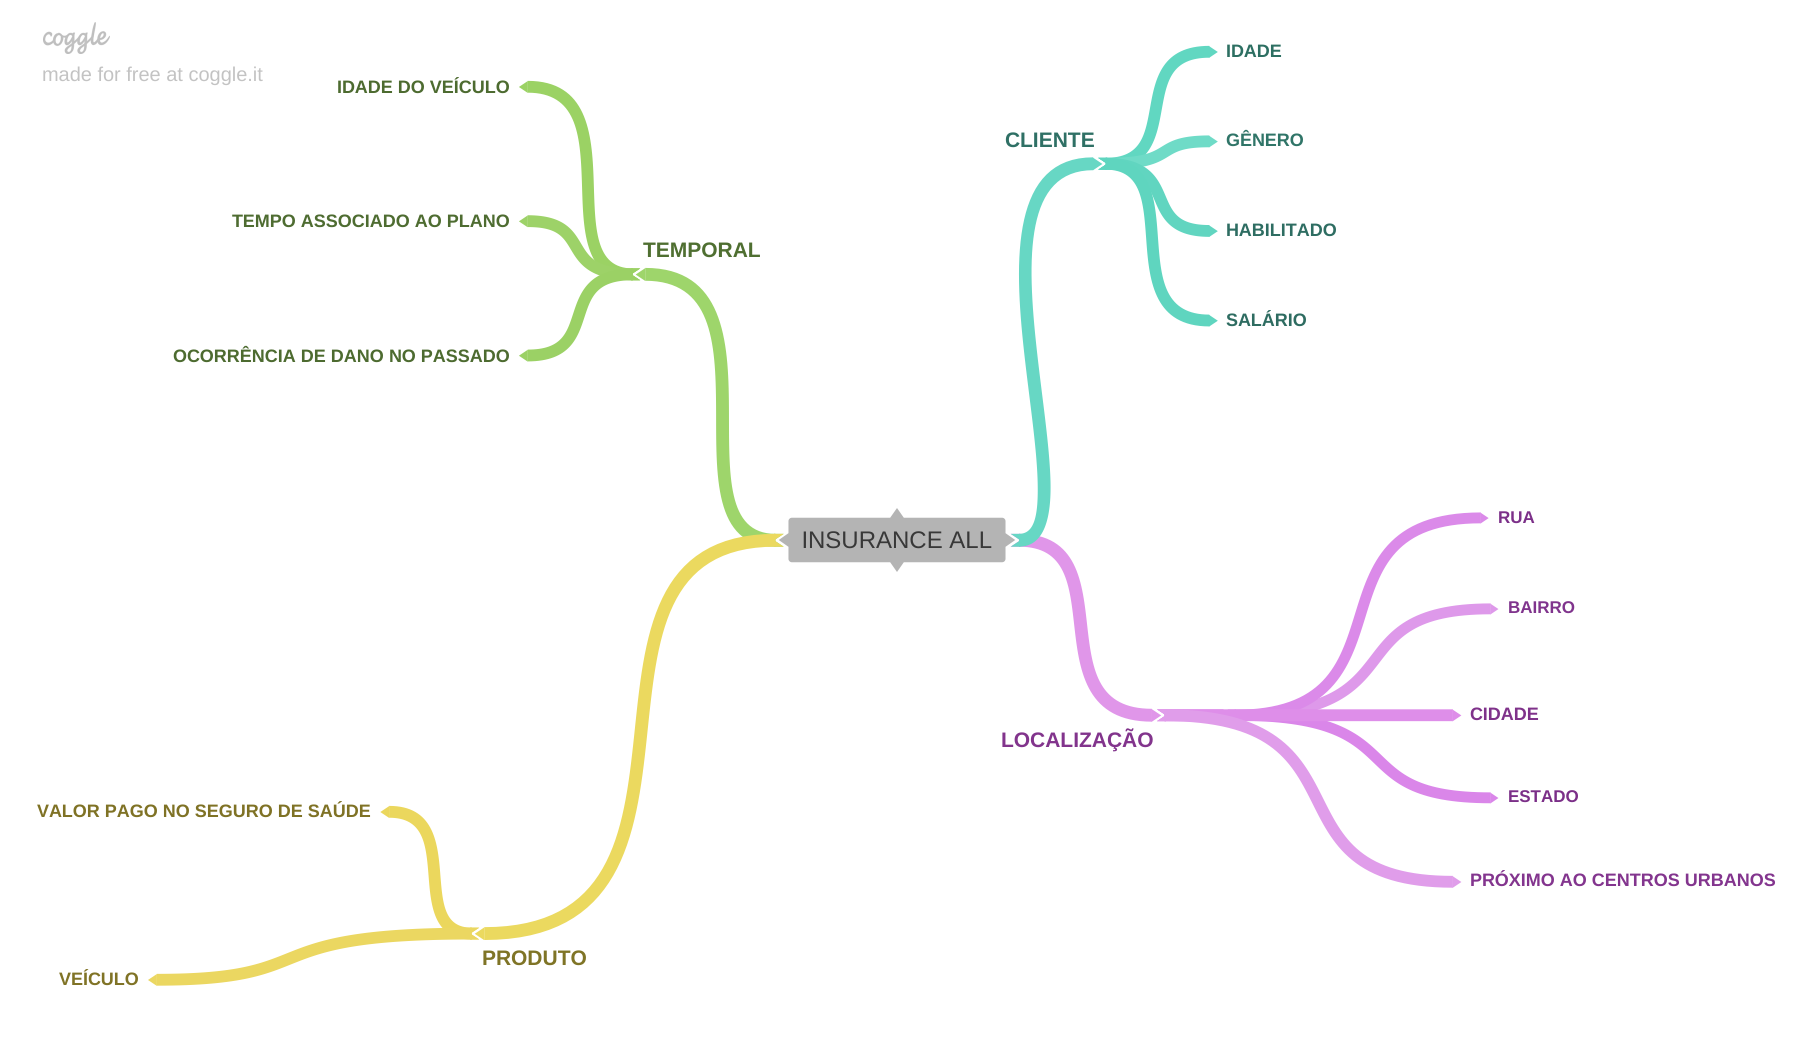

## 2.2 LIST HPYOTHESIS

## 2.3  HPYOTHESIS CUSTOMER

* Cliente mais velhos tem mais interesse em seguro automotivo

* Homens são mais habilitados do que mulheres

* Mulheres em média são menos habilitadas do que homens

* Mulheres tem mais seguros automotivos do que homens

* Homens danificam mais os veículos do que mulheres

* Homens tem mais interesse em seguro veícular do que mulheres

* Homens possuem carros mais novos


## 2.4 HPYOTHESIS TEMPORAL

* O maior número de carros são de idade superior há 2 anos. 
* Pessoas que são mais tempo associadas ao plano de saúde contém mais seguro veícular. 
* Pessoas com mais tempo associada ao plano de saúde tem mais interesse ao seguro veícular.
* Carros mais velhos ocorrem mais danos.

## 2.5 HPYOTHESIS PRODUCT

* Pessoas que pagam mais pelo seguro de saúde tem menos interesse no seguro veícular
* Pessoas que pagam menos pelo seguro de saúde tem mais registros de danos no veículo
* Pessoas que pagam mais pelo seguro de saúde tem carros mais novos

## 2.6 LIST FINAL HPYOTHESIS 

**1** - Cliente mais velhos tem mais interesse em seguro automotivo

**2** - Homens são mais habilitados do que mulheres

**3** - Mulheres tem mais seguros automotivos do que homens

**4** - Homens danificam mais os veículos do que mulhereres.

**5** - Homens tem mais interesse em seguro veícular do que mulheres

**6** - Homens possuem carros mais novos

**7** -  O maior número de carros são de idade superior há 2 anos. 

**8** -  Pessoas que são mais tempo associadas ao plano de saúde contém mais seguro veícular. 

**9** -  Pessoas com mais tempo associada ao plano de saúde tem mais interesse ao seguro veícular.

**10** -  Carros mais velhos ocorrem mais danos.

**11** - Pessoas que pagam mais pelo seguro de saúde tem menos interesse no seguro veícular

**12** - Pessoas que pagam menos pelo seguro de saúde tem mais registros de danos no veículo

**13** - Pessoas que pagam mais pelo seguro de saúde tem carros mais novos

## 2.7 FEATURE ENGERING

In [124]:
#rename the rows of colum vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'less_1_year' if x== '< 1 Year' 
                                              else 'between_1_and_2_year' if x== '1-2 Year'
                                              else 'more_2_year' 
                                              if x== '> 2 Years' else x)

#rename the rows of colum vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 0 if x=='No' else 1)

#convent the days in month
df2['vintage'] = df2['vintage'].apply(lambda x: x/30)

#convent the colum to type int
df2['vintage'] = df2['vintage'].astype('int')

# 3 - FILTERING THE DATA

## 3.1 - SELECT THE COLUMNS


# 4 - EDA


In [126]:
df4 = df2.copy(deep=True)

## 4.1 ANALSY  UNIVARIABLE THE RESPONSE VARIABLE 

The number the people that interesting are: 46710
The number the people that not has interesting are: 334399


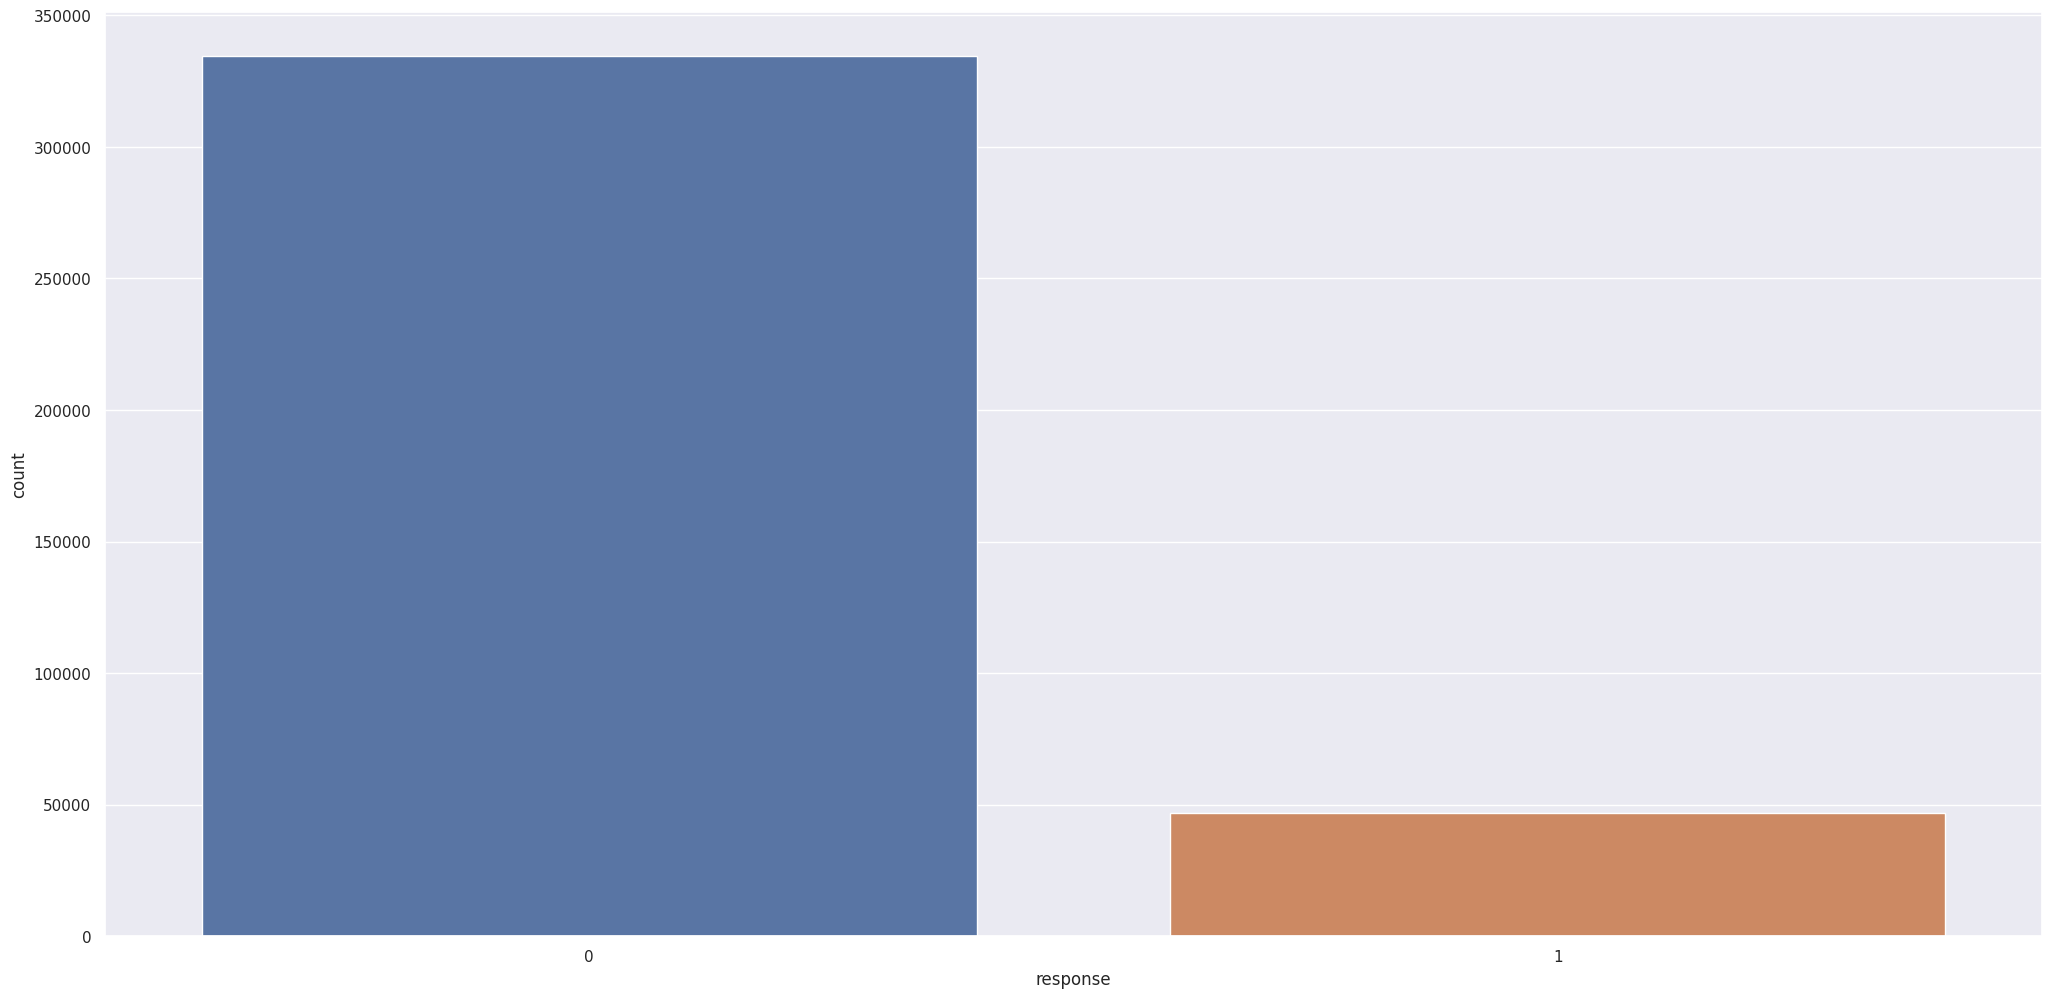

In [23]:
#people that has interesting
number_has_interesting= df4.loc[df4['response']==1]
print('The number the people that interesting are: {}'.format (len(number_has_interesting) ) )

#people that not has interesting
number_not_has_interesting= df4.loc[df4['response']==0]
print('The number the people that not has interesting are: {}'.format (len(number_not_has_interesting) ) )

#plot the response variable
sns.countplot(x= 'response', data= df4);

## 4.2 - ANALSY NUMERIC  

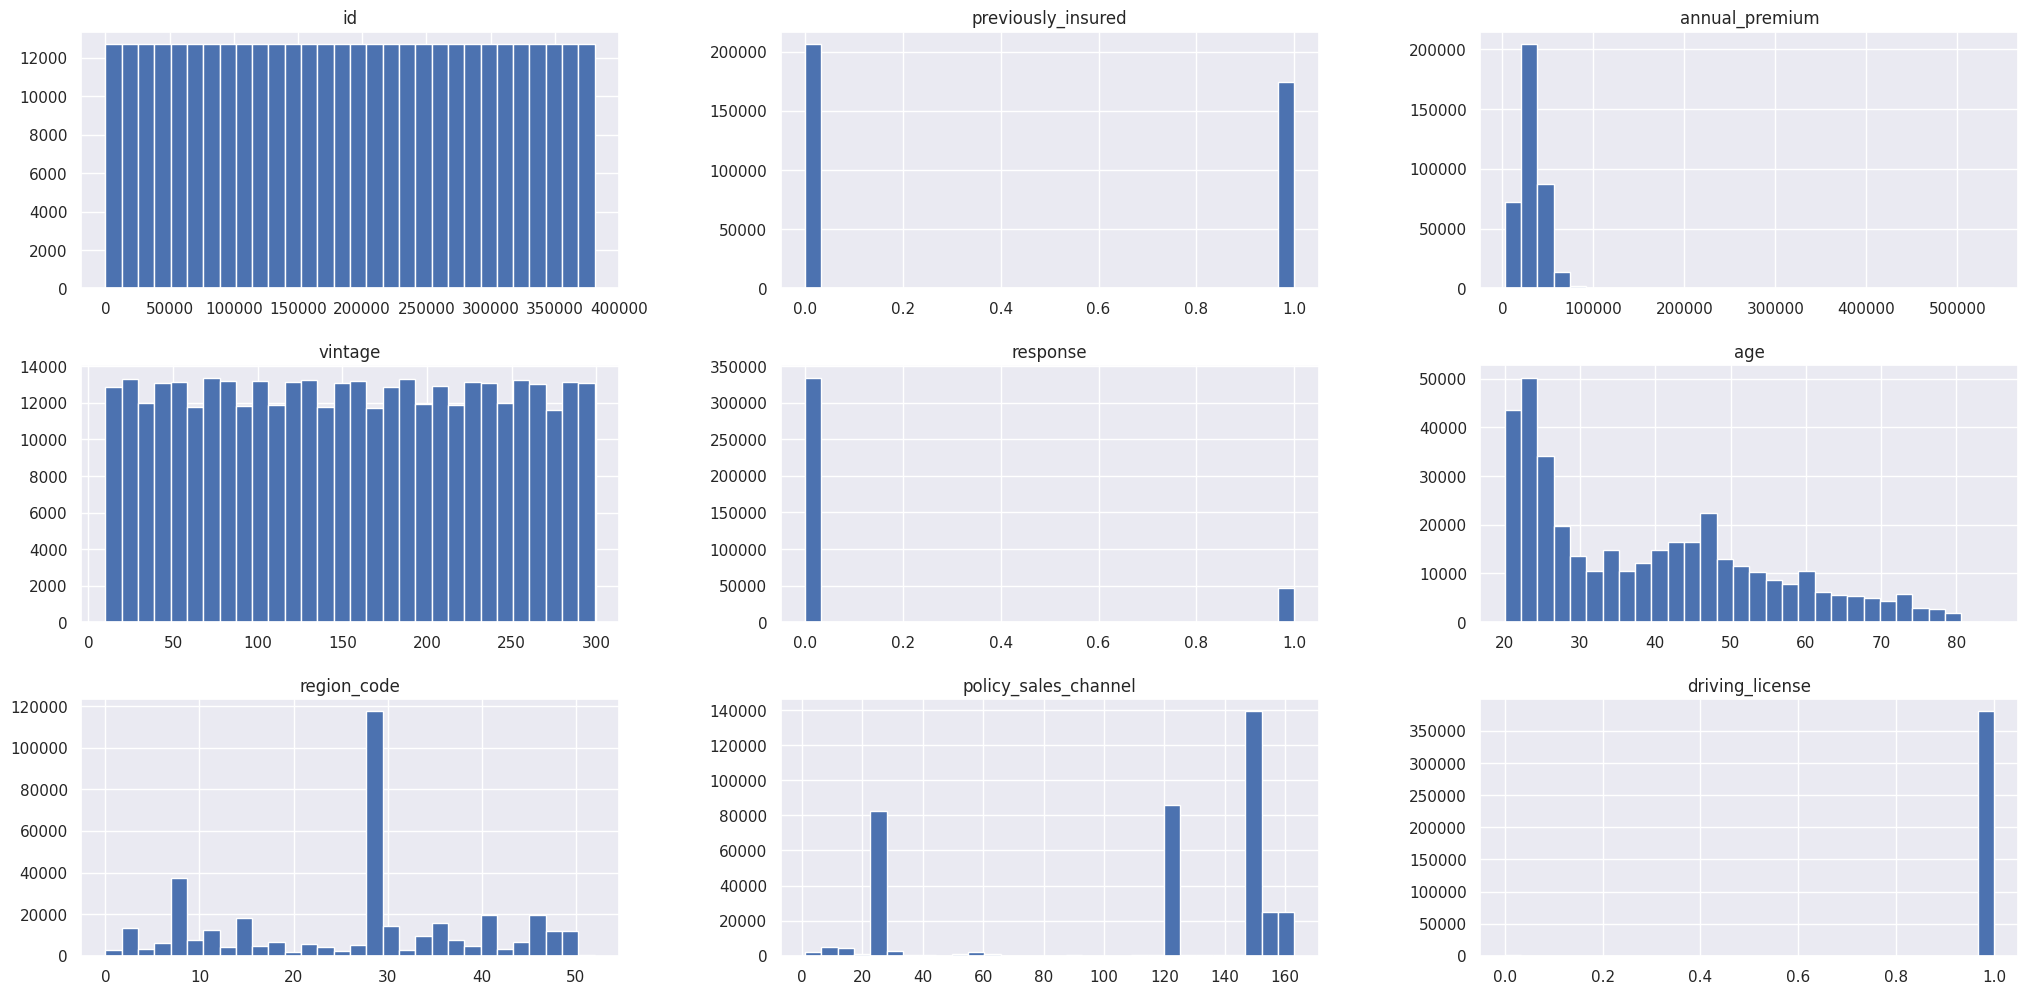

In [24]:
num_attributes.hist(bins=30);

## 4.3 ANALSY CATEGORICAL 

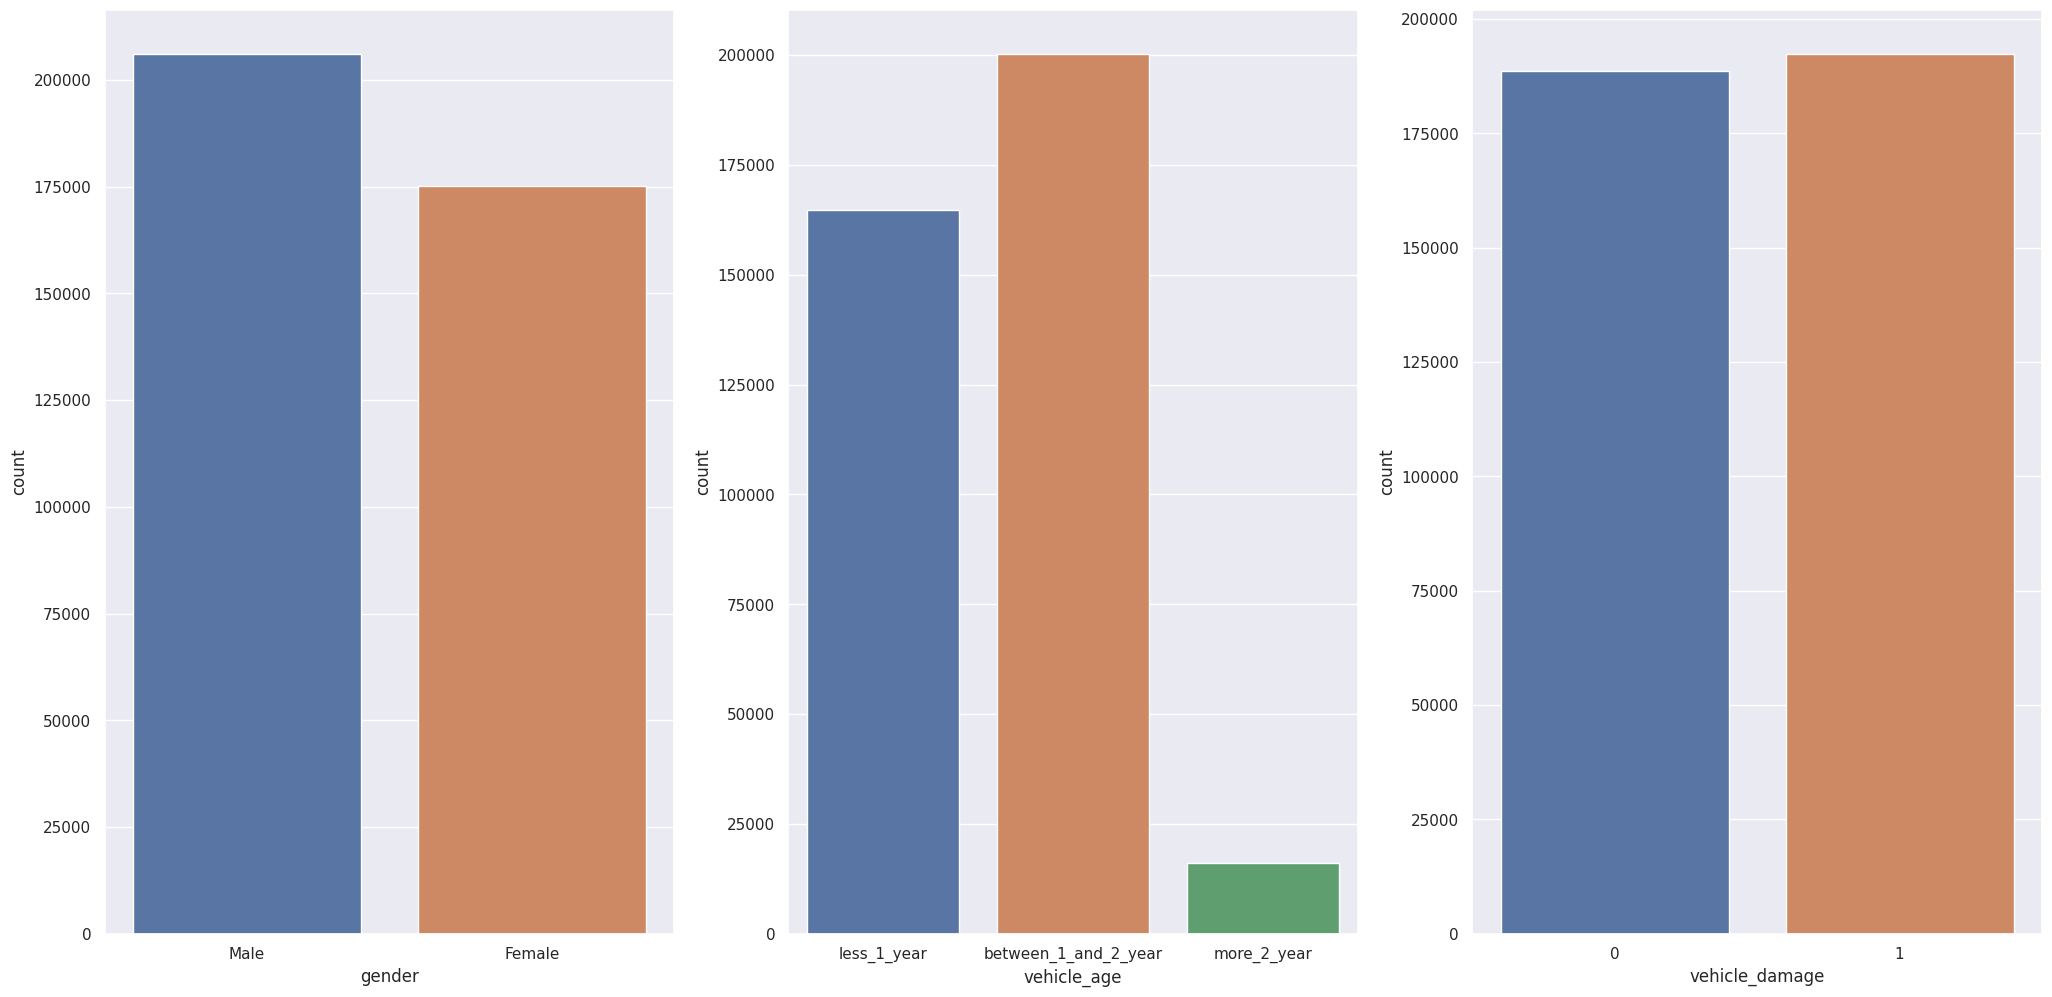

In [26]:
#categorical

#plot of gender
plt.subplot(1,3,1)
sns.countplot(x = 'gender', data = df4);

#plot vehichle age
plt.subplot(1,3,2)
sns.countplot(x = 'vehicle_age', data = df4);

#plot vehicle damage
plt.subplot(1,3,3)
sns.countplot(x = 'vehicle_damage', data=df4);

## 4.2 ANALSY BIVARIABLE

### H1 - Clientes acima de 40 anos tem mais interesse em seguro automotivo.

**Falso:** Clientes acima ou abaixo de 40 anos não possuem diferença de interesse. .

In [77]:
#ordenar e agrupar
#idade (age) e resposta (response)
#separar as idades
#plotar gráfico para comparar com clientes que tem interesse e não tem interesse

aux_h1 = df4[['age','response']].groupby('age').median().reset_index() 

#acima dos 40
#more_40 = aux_h1.loc[aux_h1['age']> 40]

#
#less_40 = aux_h1.loc[aux_h1['age']< 40]

aux_h1['more_and_less'] = aux_h1['age'].apply(lambda x: 'more_40' if x> 40 else 'less_40' if x<= 40 else x )

aux_group_age = aux_h1[['response','more_and_less']].groupby('more_and_less').mean().reset_index()

aux_group_age

,more_and_less,response
0,less_40,0.0
1,more_40,0.0


### H2 - Homens são mais habilitados do que mulheres.

**Falso:**  Homens e mulheres não possuem superioridade ou inferioridade entre habilitados

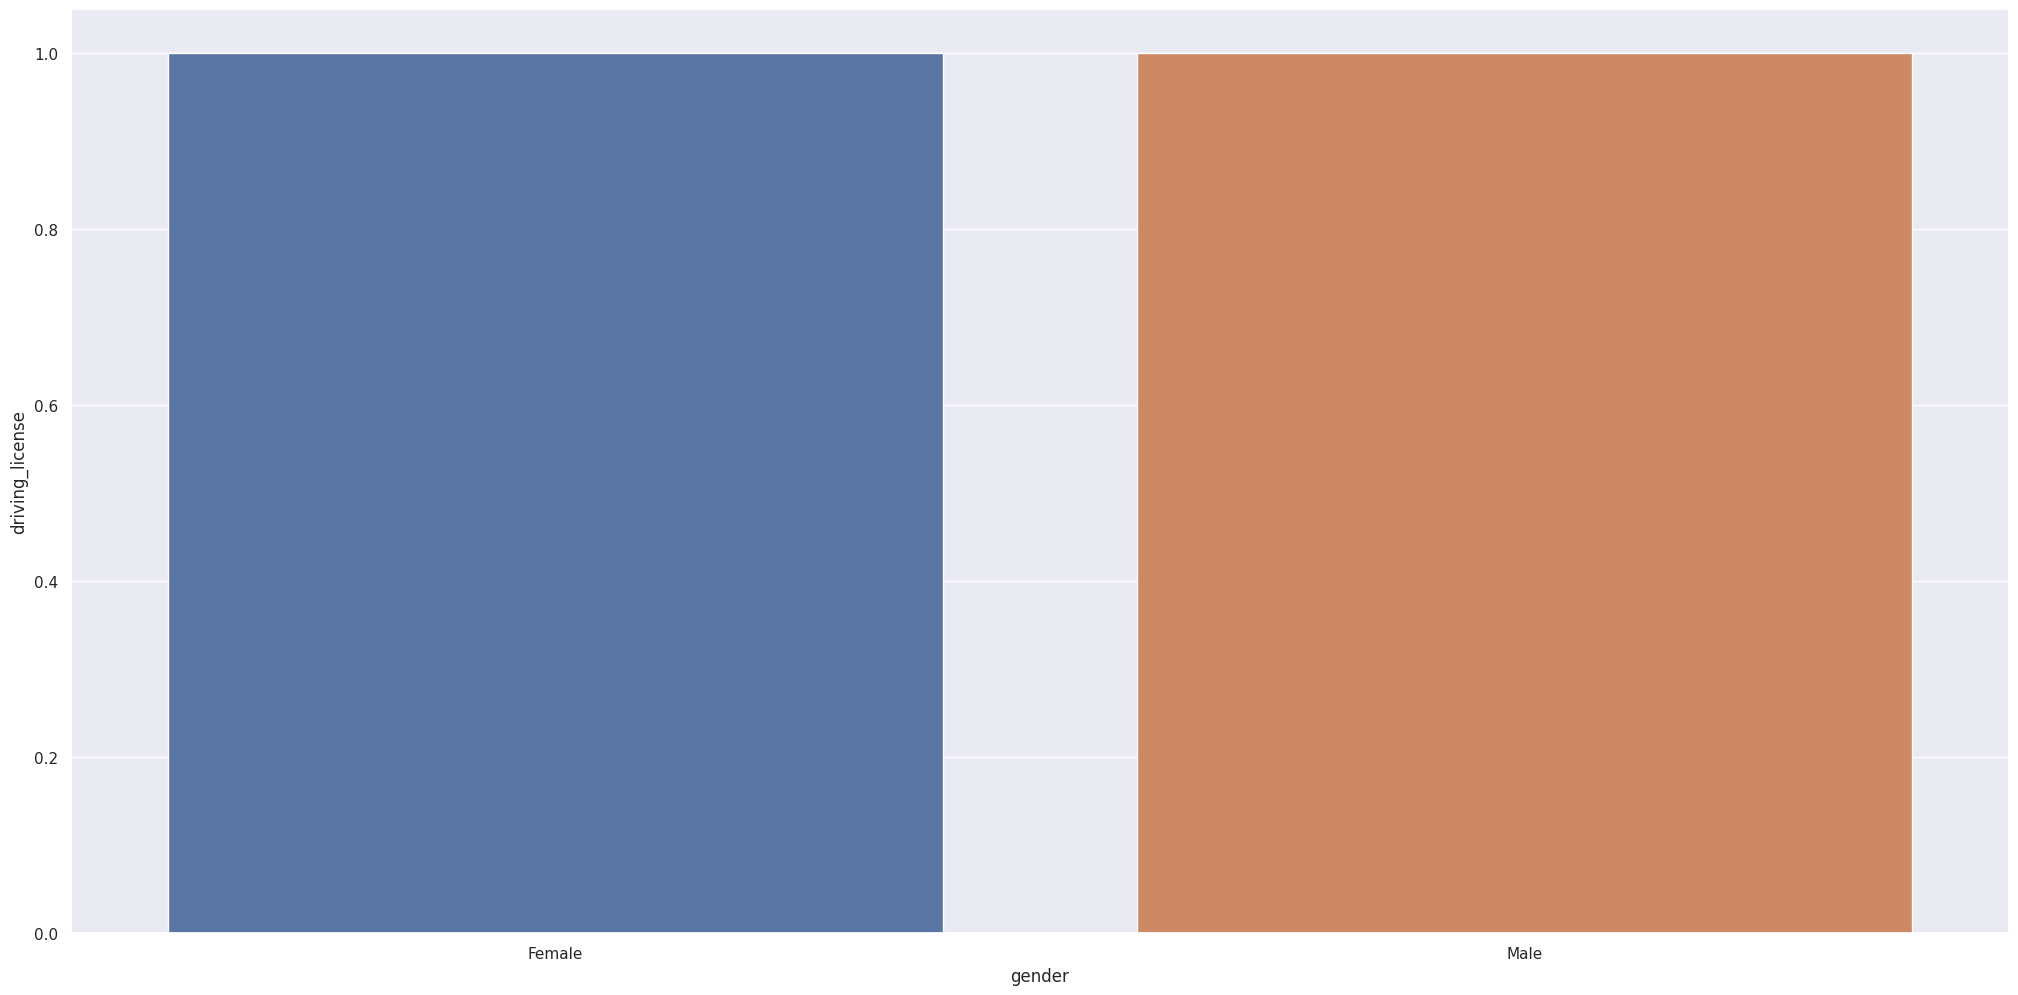

In [81]:
aux_h2= df4[['gender','driving_license']].groupby('gender').median().reset_index()

sns.barplot(x= aux_h2['gender'], y= aux_h2['driving_license']);

### H3 - Mulheres tem mais seguros automotivos do que homens.
**Verdadeiro:** Mulheres tem mais seguros de veículos do que homens

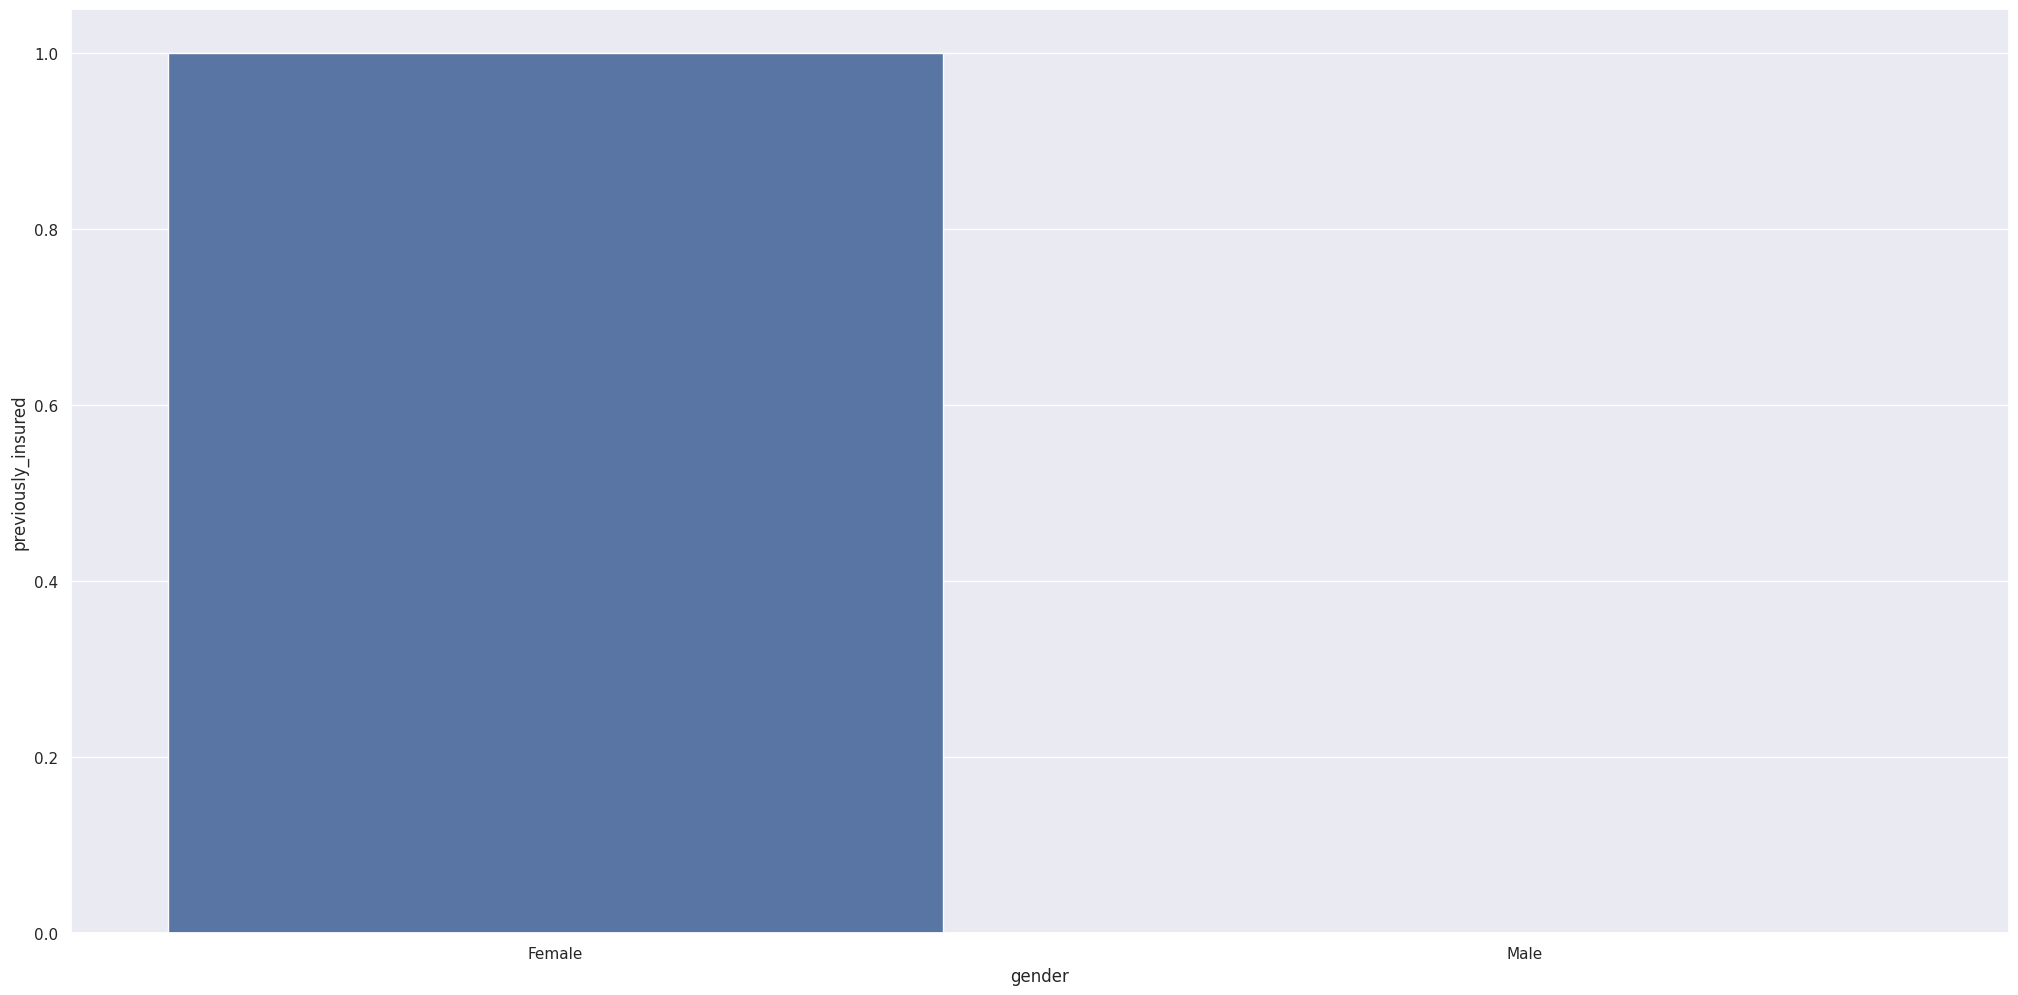

In [85]:
aux_h3 = df4[['gender','previously_insured']].groupby('gender').median().reset_index()

sns.barplot(x= 'gender', y = 'previously_insured', data=aux_h3);

### H4 - Homens danificam mais os veículos do que mulheres.

**Verdadeiro:** Homens danificam mais os veículos do que mulheres

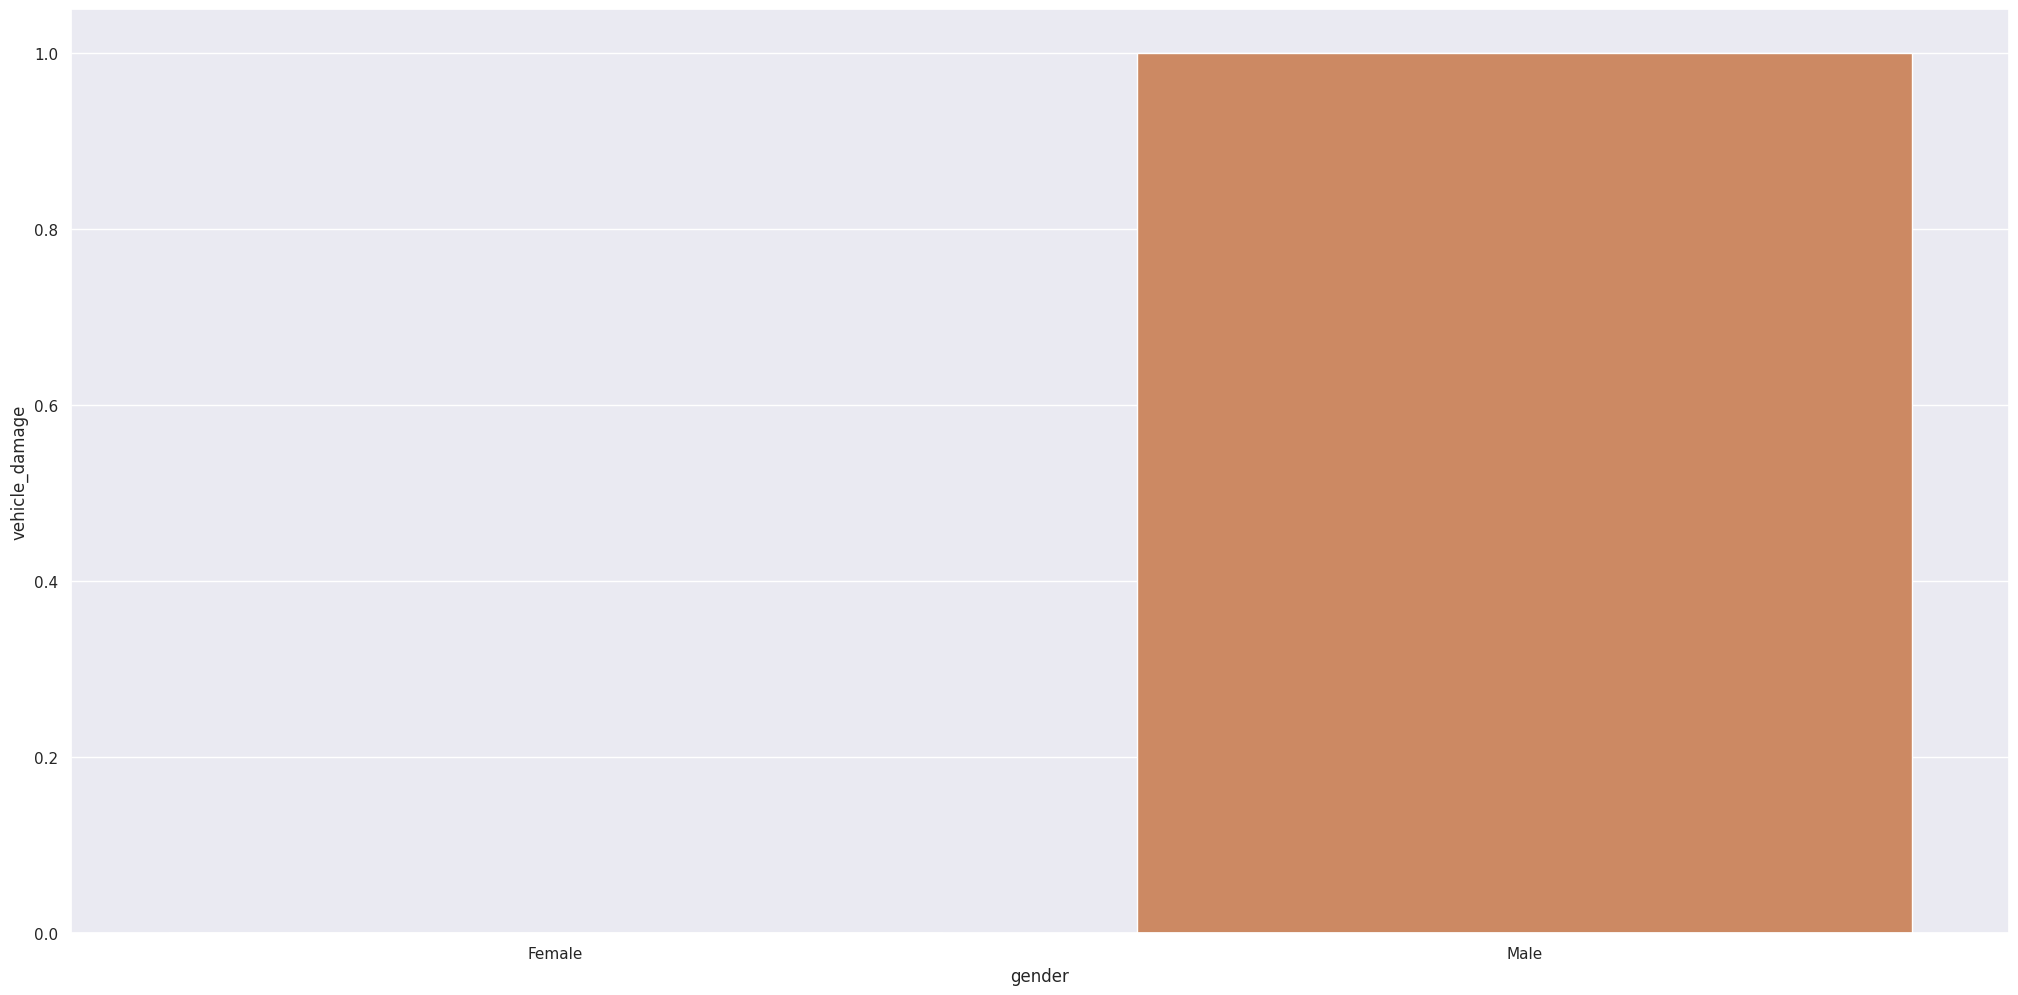

In [87]:
aux_h4 = df4[['gender','vehicle_damage']].groupby('gender').median().reset_index()

sns.barplot(x= 'gender', y = 'vehicle_damage', data= aux_h4);

### H5 - Homens tem mais interesse em seguro veícular do que mulheres
**Falso:** Homens e mulheres na média não tem diferença de interesse

In [91]:
aux_h5 = df4[['gender', 'response']].groupby('gender').median().reset_index()

aux_h5

,gender,response
0,Female,0.0
1,Male,0.0


In [127]:
df4.head()

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,7,0,23367,8,0,Male,23,11,152,1,less_1_year,1
1,13,1,31409,7,0,Female,41,15,14,1,between_1_and_2_year,0
2,18,1,46622,9,0,Female,25,35,152,1,less_1_year,0
3,31,0,2630,4,0,Female,26,8,160,1,less_1_year,0
4,39,0,42297,8,0,Male,45,8,124,1,between_1_and_2_year,1
